In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_excel("AssignmentData.xlsx",sheet_name='WorkerFunnel')

In [4]:
data.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [5]:
data.describe()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197,1197,1197,1197.0,1197,1197,1168.000000
unique,59,5,2,10.0,144,62,867.000000
top,2015-11-03 00:00:00,Q1,Sewing,0.8,960,8,0.800402
freq,24,360,691,539.0,129,262,24.000000


In [6]:
data.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64

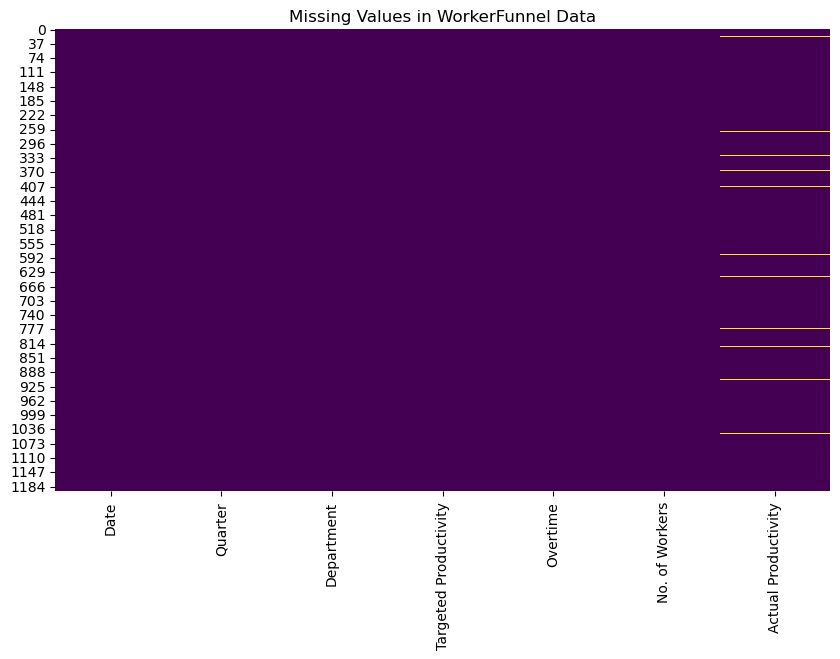

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in WorkerFunnel Data')
plt.show()

In [8]:
data.dropna(inplace=True)


In [9]:
data.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [10]:
data.duplicated().sum()

35

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1133,1133,1133,1133.0,1133,1133,1133.000000
unique,59,5,2,10.0,144,62,867.000000
top,2015-10-03 00:00:00,Q1,Sewing,0.8,960,8,0.800402
freq,23,337,645,501.0,123,252,24.000000


In [14]:
data['Date'] = pd.to_datetime(data['Date'])  

In [15]:
data['Overtime'].value_counts()

Overtime
960                     123
1440                    106
6960                     57
6840                     46
1800                     38
                       ... 
7980                      1
6420                      1
Some secret message?      1
5460                      1
3120                      1
Name: count, Length: 144, dtype: int64

In [16]:
data

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01,Q1,Sewing,0.8,3660,30.5,0.80057
5,2015-01-01,Q1,Sewing,0.8,6720,56,0.800125
6,2015-01-01,Q1,Finishing,0.75,960,8,0.755167
...,...,...,...,...,...,...,...
1191,2015-11-03,Q2,Sewing,0.65,6840,57,0.650596
1192,2015-11-03,Q2,Finishing,0.75,960,8,0.628333
1194,2015-11-03,Q2,Finishing,0.65,960,8,0.625625
1195,2015-11-03,Q2,Finishing,0.75,1800,15,0.505889


In [17]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Department' column
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])
data['Quarter']=le.fit_transform(data['Quarter'])

In [18]:
data= data.apply(pd.to_numeric, errors='coerce')


In [19]:
data.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    1
Overtime                 1
No. of Workers           1
Actual Productivity      1
dtype: int64

In [20]:
data.dropna(inplace=True)

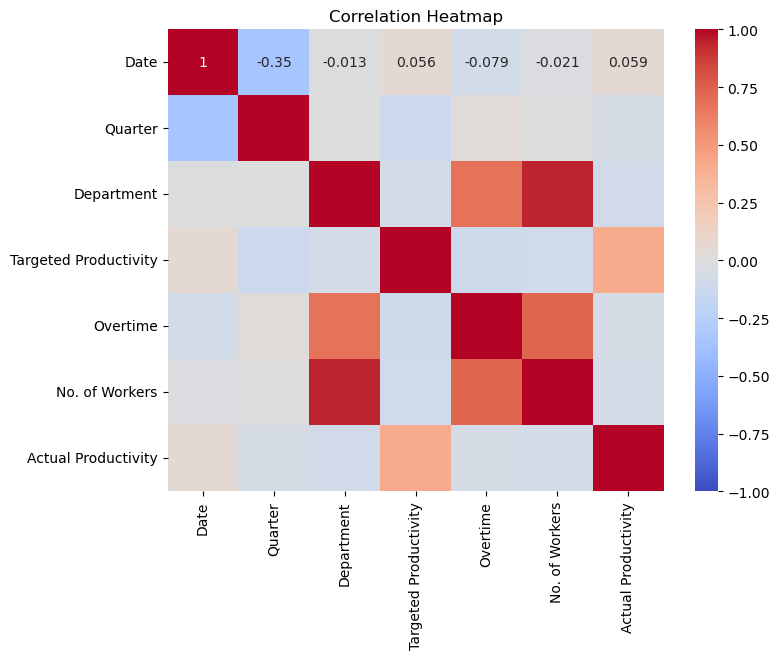

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


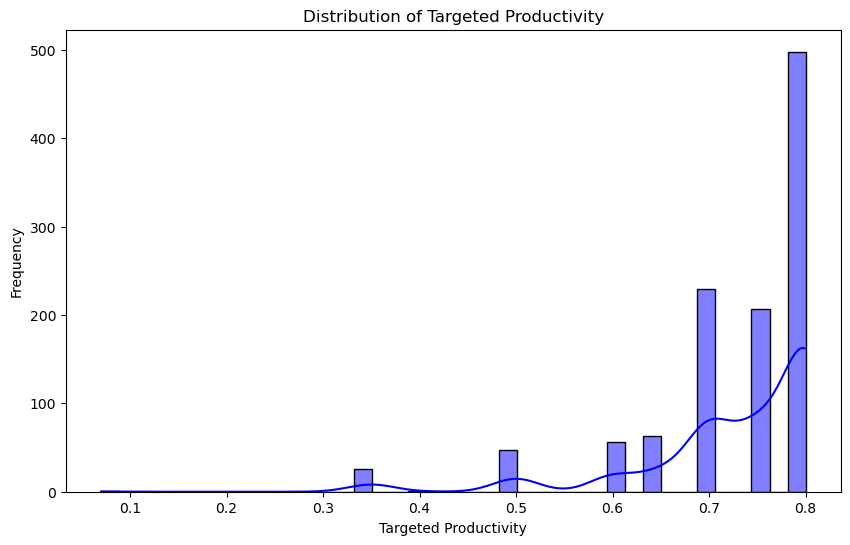

In [22]:
# Distribution of Targeted Productivity
plt.figure(figsize=(10, 6))
sns.histplot(data['Targeted Productivity'], kde=True, color='blue')
plt.title('Distribution of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.show()


C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


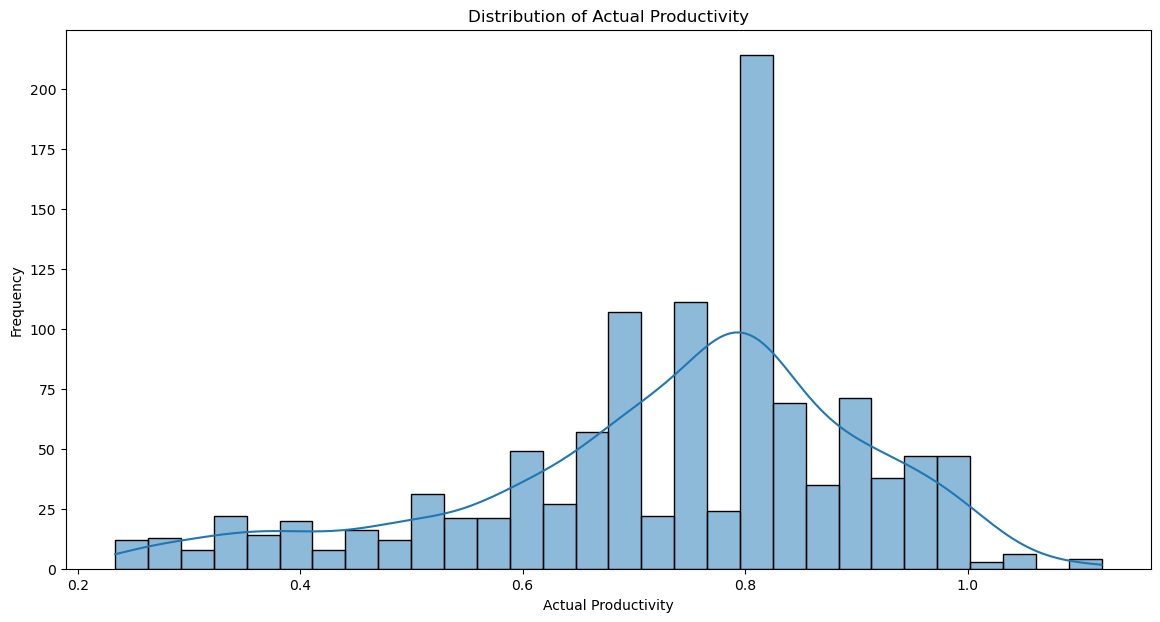

In [23]:
# Plotting distribution of 'Actual Productivity'
plt.figure(figsize=(14, 7))
sns.histplot(data['Actual Productivity'], kde=True, bins=30)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

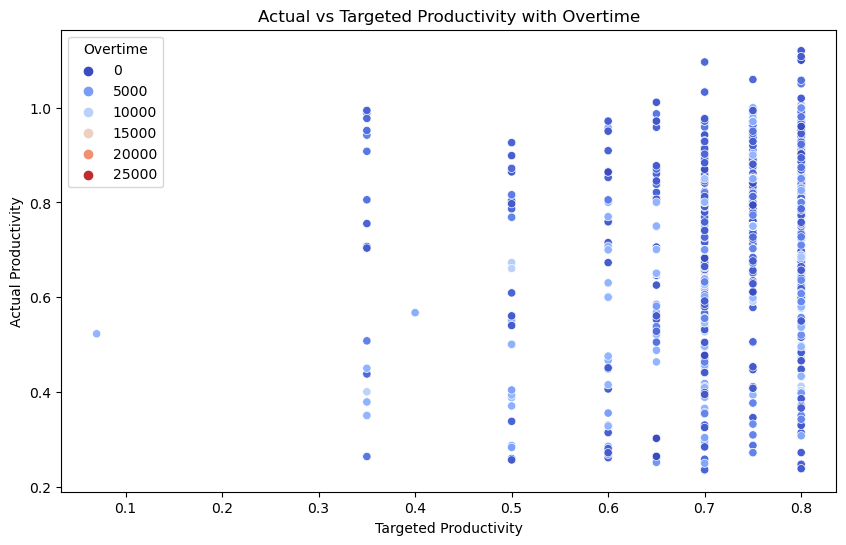

In [24]:
# Scatter plot between Targeted Productivity and Actual Productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Targeted Productivity', y='Actual Productivity', hue='Overtime', palette='coolwarm')
plt.title('Actual vs Targeted Productivity with Overtime')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.show()

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

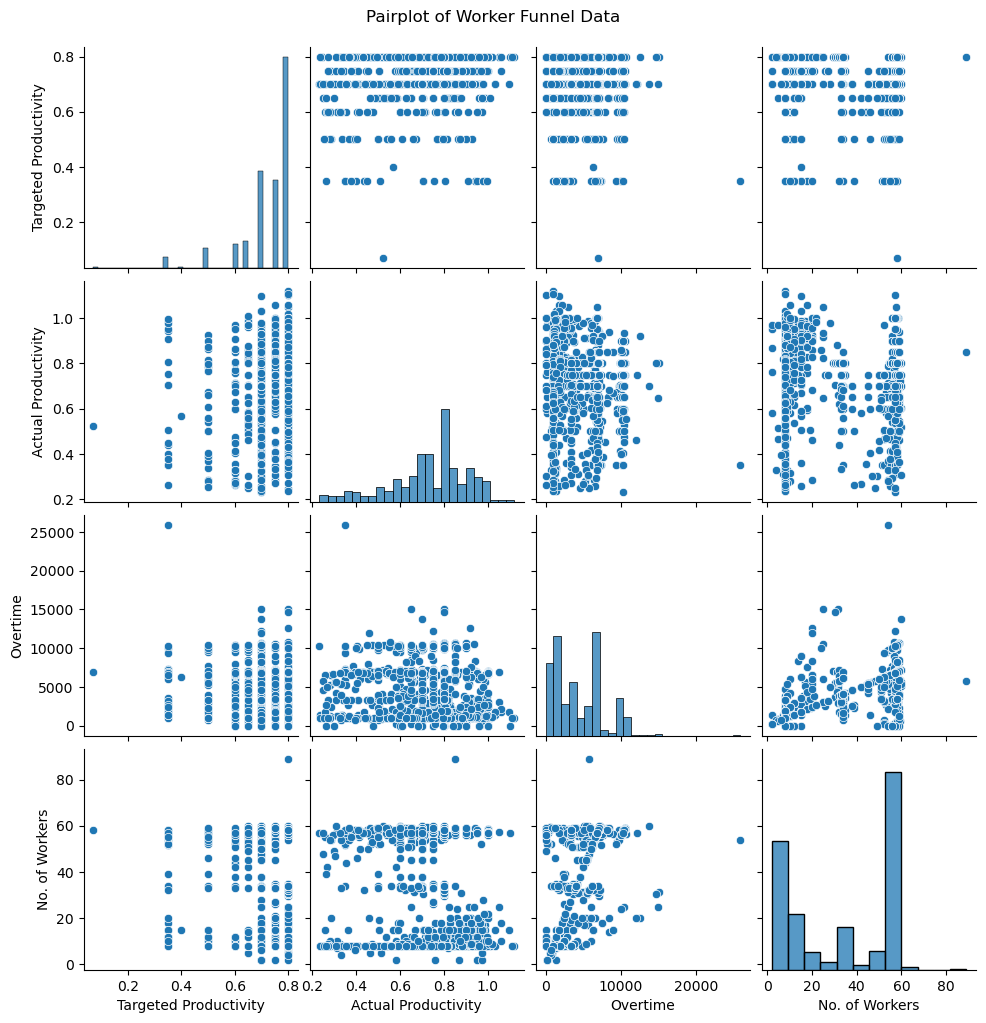

In [25]:
# Pairplot to visualize relationships between features
sns.pairplot(data[['Targeted Productivity', 'Actual Productivity', 'Overtime', 'No. of Workers']])
plt.suptitle('Pairplot of Worker Funnel Data', y=1.02)
plt.show()


<Axes: >

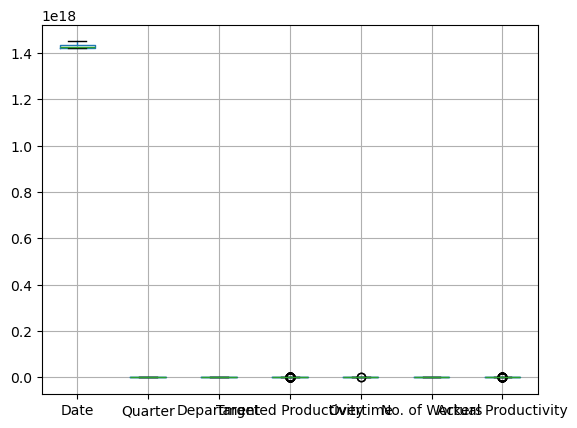

In [26]:
data.boxplot()

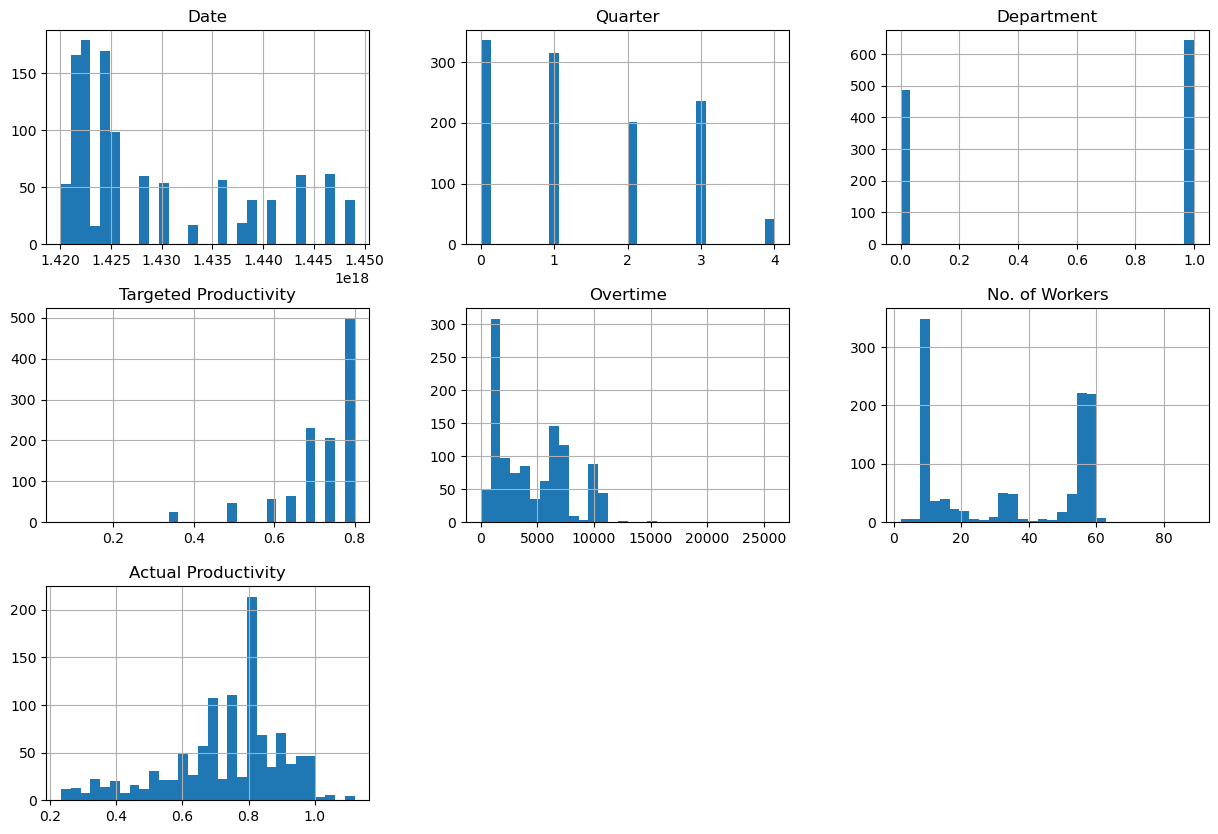

In [27]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']
x = data[features].values
x = StandardScaler().fit_transform(x)

In [30]:
pca = PCA()
principal_components = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.45003104 0.33516563 0.14752071 0.06728263]


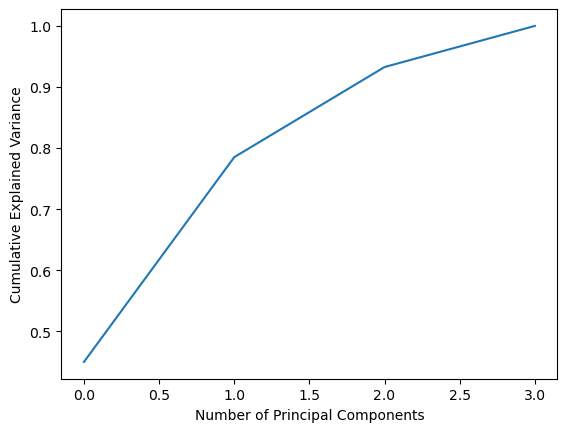

In [31]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-

MSE: 0.026286516283403394, MAPE: 0.2952308218472578


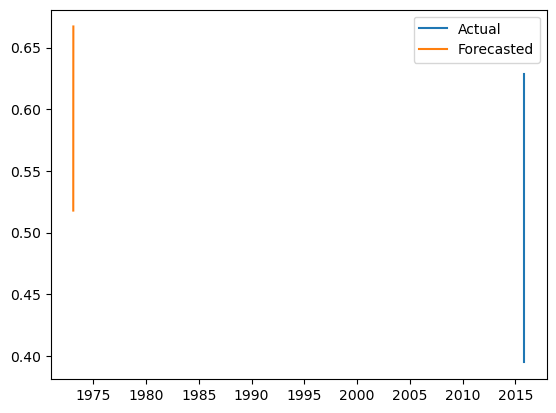

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Prepare data for ARIMA model (e.g., setting the Date column as index)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(data['Actual Productivity'], order=(1, 1, 1))  # Example order, tune as needed
model_fit = model.fit()

# Forecast for the next four quarters
forecast = model_fit.forecast(steps=4)

# Evaluate the model
mse = mean_squared_error(data['Actual Productivity'][-4:], forecast)
mape = mean_absolute_percentage_error(data['Actual Productivity'][-4:], forecast)
print(f'MSE: {mse}, MAPE: {mape}')

# Visualize forecasted vs actual productivity
plt.plot(data.index[-4:], data['Actual Productivity'][-4:], label='Actual')
plt.plot(forecast.index, forecast, label='Forecasted')
plt.legend()
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Split the data into training and testing sets
train = data[:-4]  # Use all but the last 4 weeks for training
test = data[-4:]   # Use the last 4 weeks for testing

# Fit the ARIMA model (adjust the order (p,d,q) as needed based on ACF/PACF plots)
model = ARIMA(train['Actual Productivity'], order=(5, 1, 0))  # Adjust p, d, q based on your data
model_fit = model.fit()

# Forecast the next 4 weeks (quarters)
forecast = model_fit.forecast(steps=4)

# Evaluate the model
mape = mean_absolute_percentage_error(test['Actual Productivity'], forecast)
mse = mean_squared_error(test['Actual Productivity'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-

Mean Absolute Percentage Error (MAPE): 0.30
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


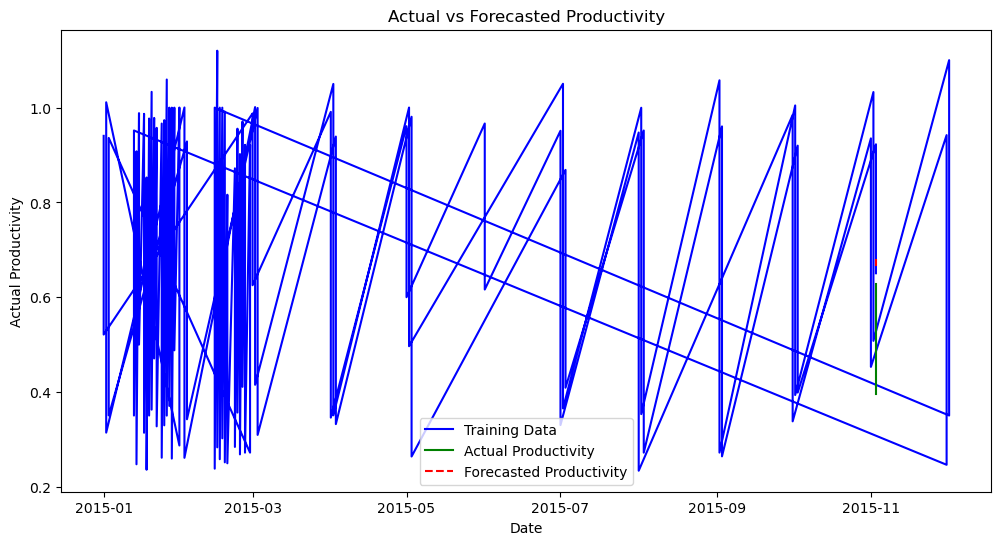

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Actual Productivity'], label='Training Data', color='blue')
plt.plot(test.index, test['Actual Productivity'], label='Actual Productivity', color='green')
plt.plot(test.index, forecast, label='Forecasted Productivity', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Actual vs Forecasted Productivity')
plt.legend()
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Split the data into training and testing sets
train = data[:-4]  # All data except the last 4 weeks (quarters)
test = data[-4:]   # Last 4 weeks of data for validation

# Fit the ARIMA model (adjust p, d, q as needed)
model = ARIMA(train['Actual Productivity'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 4 weeks
forecast = model_fit.forecast(steps=4)

C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\balak\anaconda3\Lib\site-

In [36]:
mape = mean_absolute_percentage_error(test['Actual Productivity'], forecast)
mse = mean_squared_error(test['Actual Productivity'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Percentage Error (MAPE): 0.30
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


In [39]:
pip install pmdarima

In [42]:
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
auto_arima_model = auto_arima(train['Actual Productivity'], 
                              start_p=1, start_q=1,
                              max_p=5, max_q=5, 
                              m=12, start_P=0, 
                              seasonal=True, 
                              d=None, D=1, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

# Fit the model
model_fit = auto_arima_model.fit(train['Actual Productivity'])

# Forecast
forecast = model_fit.predict(n_periods=4)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=18.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=280.028, Time=0.74 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-720.749, Time=4.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=278.030, Time=0.20 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-381.945, Time=0.51 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-951.561, Time=13.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=25.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.82 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-577.644, Time=5.39 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-956.047, Time=19.70 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-727.515, Time=6.60 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=21.76 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=

C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
model_fit = auto_arima_model.fit(data['Actual Productivity'])

# Forecast the next 4 weeks
forecast = model_fit.predict(n_periods=4)

# Evaluate the model
mape = mean_absolute_percentage_error(test['Actual Productivity'], forecast)
mse = mean_squared_error(test['Actual Productivity'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Percentage Error (MAPE): 0.52
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.31


C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


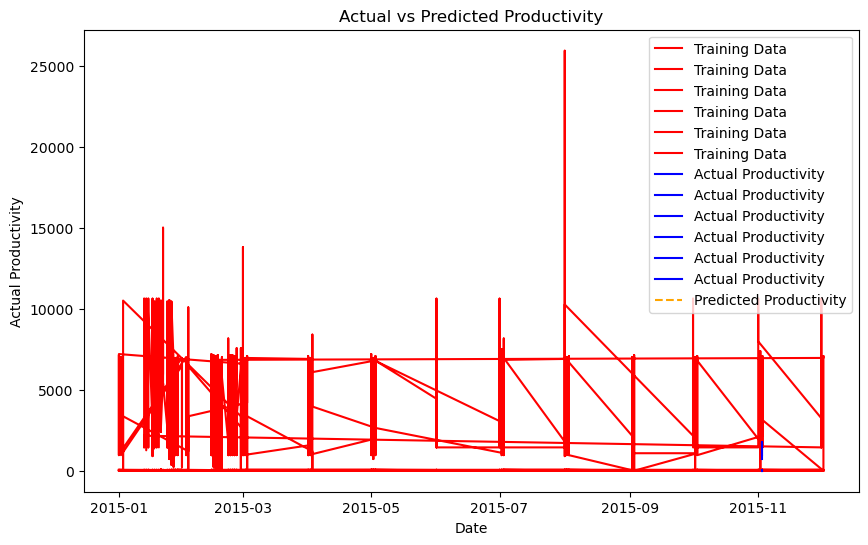

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data',color='red')
plt.plot(test.index, test, label='Actual Productivity', color='blue')
plt.plot(test.index, forecast, label='Predicted Productivity', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Actual vs Predicted Productivity')
plt.legend()
plt.show()

C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\balak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


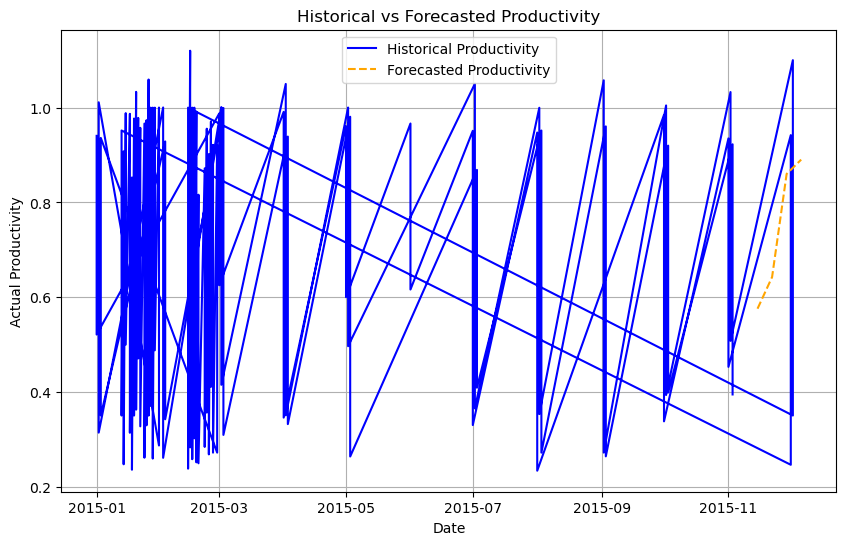

            Forecasted Productivity
2015-11-15                      NaN
2015-11-22                      NaN
2015-11-29                      NaN
2015-12-06                      NaN


In [43]:
model_fit = auto_arima_model.fit(data['Actual Productivity'])

# Forecast the next 4 weeks (quarters)
forecast = model_fit.predict(n_periods=4)

# Create a date range for the forecasted period
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=5, freq='W')[1:]

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Actual Productivity'], label='Historical Productivity', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Productivity', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Historical vs Forecasted Productivity')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
forecast_df = pd.DataFrame({'Forecasted Productivity': forecast}, index=forecast_dates)
print(forecast_df)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
features = data[['Actual Productivity', 'Overtime', 'No. of Workers']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\balak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\balak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\balak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\balak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

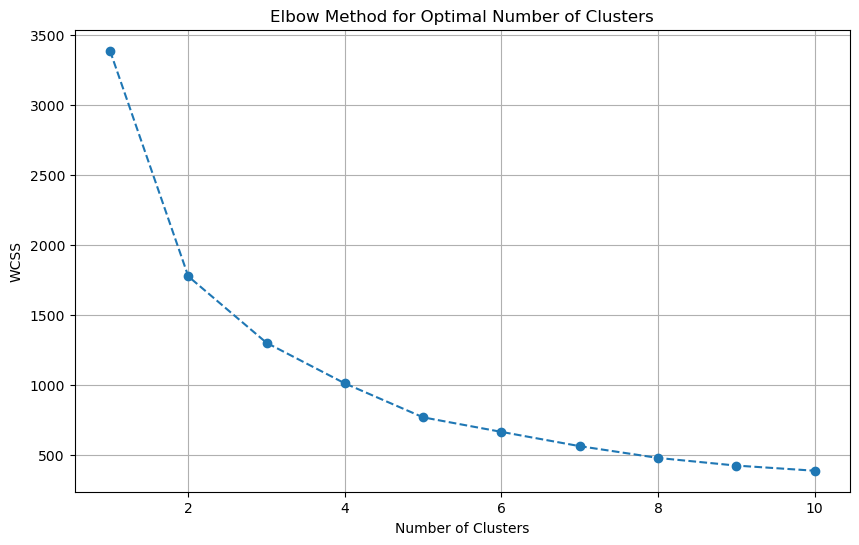

In [51]:
# Using the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [52]:
# Based on the Elbow method, choose the optimal number of clusters, e.g., 3
optimal_clusters = 6  # Replace with the optimal number from the Elbow method

# Applying K-Means to the data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\balak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


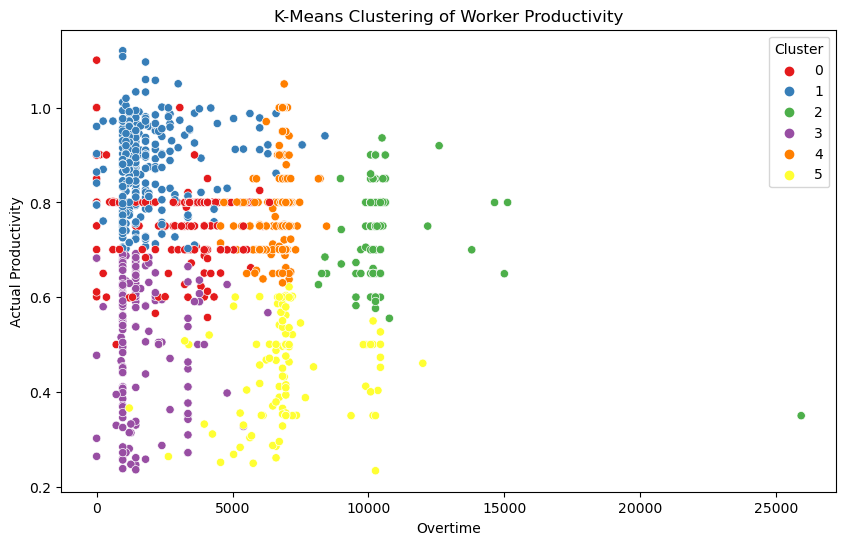

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Overtime'], y=data['Actual Productivity'], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering of Worker Productivity')
plt.show()

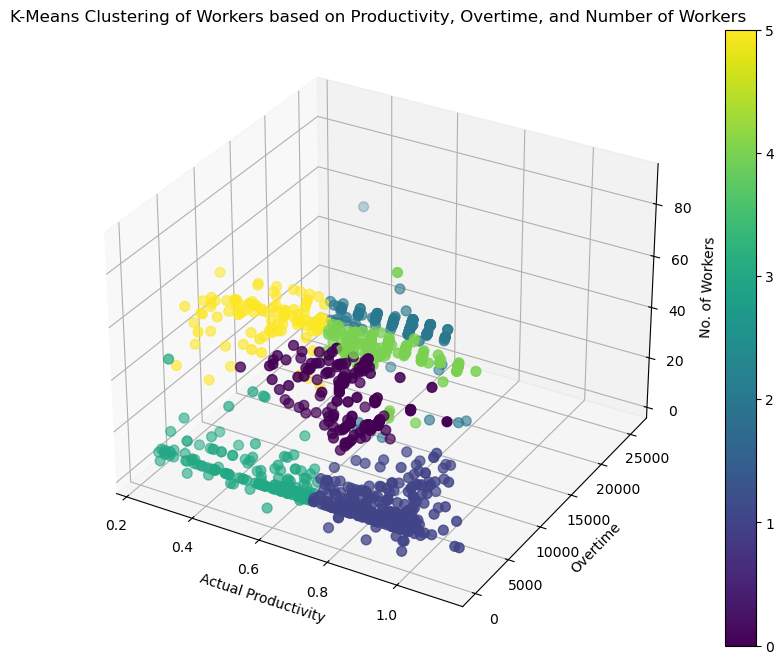

In [54]:
# 3D Plot for visualizing the clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Actual Productivity'], data['Overtime'], data['No. of Workers'],
                     c=data['Cluster'], s=50, cmap='viridis')

ax.set_xlabel('Actual Productivity')
ax.set_ylabel('Overtime')
ax.set_zlabel('No. of Workers')
plt.title('K-Means Clustering of Workers based on Productivity, Overtime, and Number of Workers')
plt.colorbar(scatter)
plt.show()

In [57]:
from sklearn.ensemble import IsolationForest

In [55]:
data1= pd.read_excel("AssignmentData.xlsx",sheet_name='creditcard')

In [56]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
for column in data1.columns:
    data1[column] = pd.to_numeric(data1[column], errors='coerce')

# Drop rows with NaN values (caused by non-numeric data)
data1 = data1.dropna()

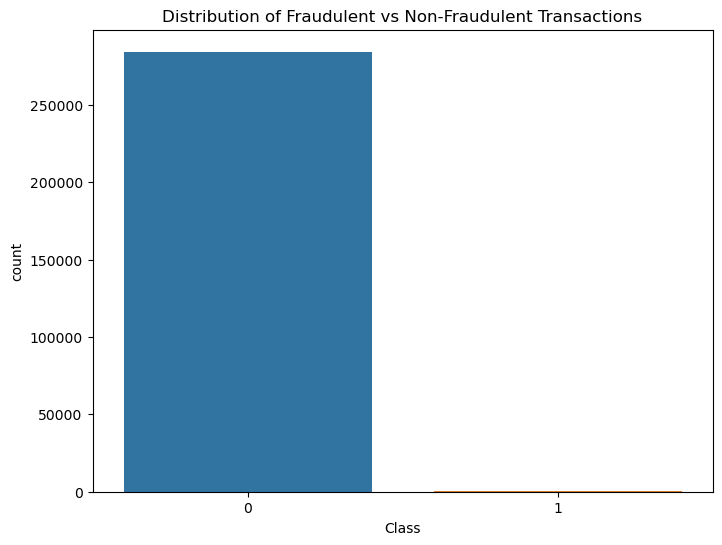

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable 'Class'
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data1)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


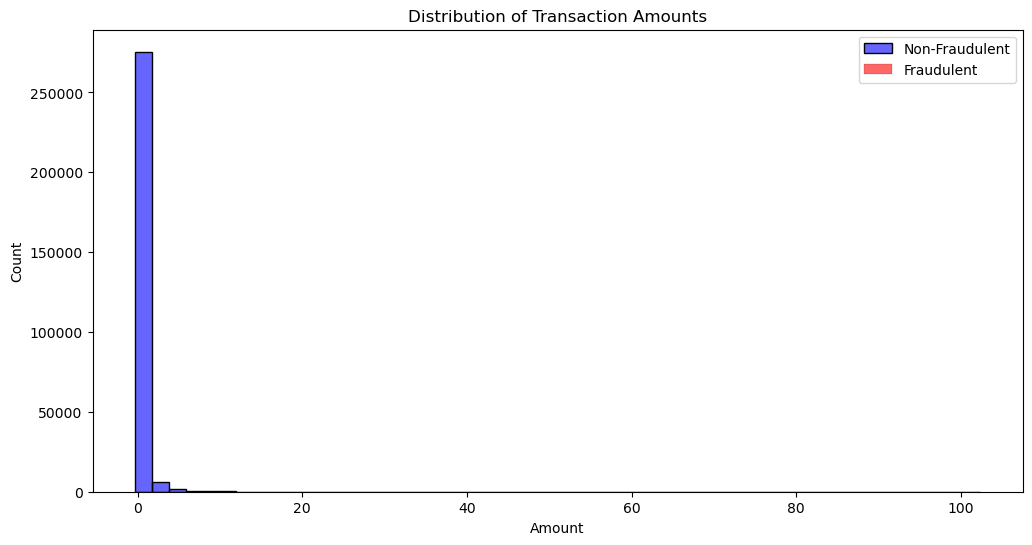

In [70]:
# Distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=data1[data1['Class'] == 0], x='Amount', bins=50, color='blue', label='Non-Fraudulent', alpha=0.6)
sns.histplot(data=data1[data1['Class'] == 1], x='Amount', bins=50, color='red', label='Fraudulent', alpha=0.6)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.legend()
plt.show()

In [71]:
scaler = StandardScaler()
data1[['Time', 'Amount']] = scaler.fit_transform(data1[['Time', 'Amount']])
     

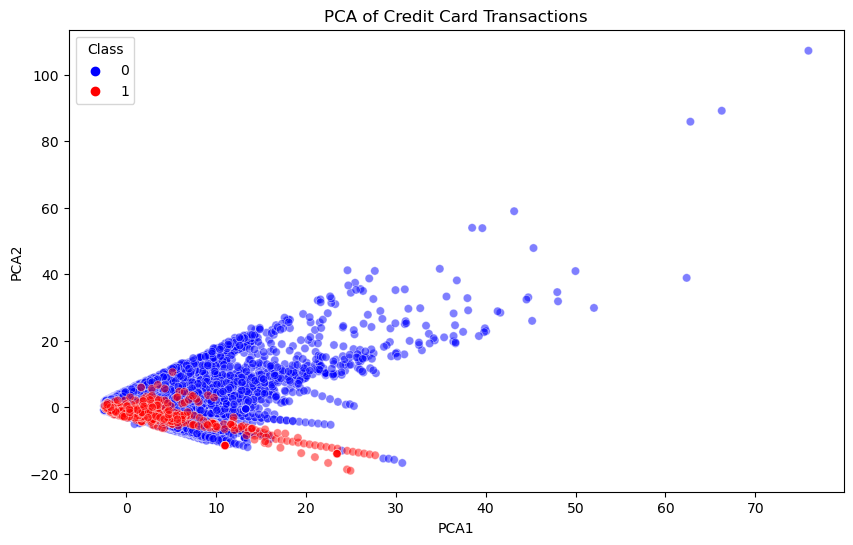

In [72]:
from sklearn.decomposition import PCA

# Select features for PCA
features = data1.drop(['Class'], axis=1)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Add PCA components to the dataframe
transactions_pca = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
transactions_pca['Class'] = data1['Class'].values

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=transactions_pca, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('PCA of Credit Card Transactions')
plt.show()

In [74]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
data1['Isolation_Forest'] = iso_forest.fit_predict(features)
data1['Isolation_Forest'] = data1['Isolation_Forest'].map({1: 0, -1: 1})

# Evaluate
print(classification_report(data1['Class'], data1['Isolation_Forest']))
print('ROC-AUC Score:', roc_auc_score(data1['Class'], data1['Isolation_Forest']))

C:\Users\balak\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284310
           1       0.24      0.14      0.18       492

    accuracy                           1.00    284802
   macro avg       0.62      0.57      0.59    284802
weighted avg       1.00      1.00      1.00    284802

ROC-AUC Score: 0.5697420841729784


In [79]:
print(data1['Isolation_Forest'].unique())

[0 1]


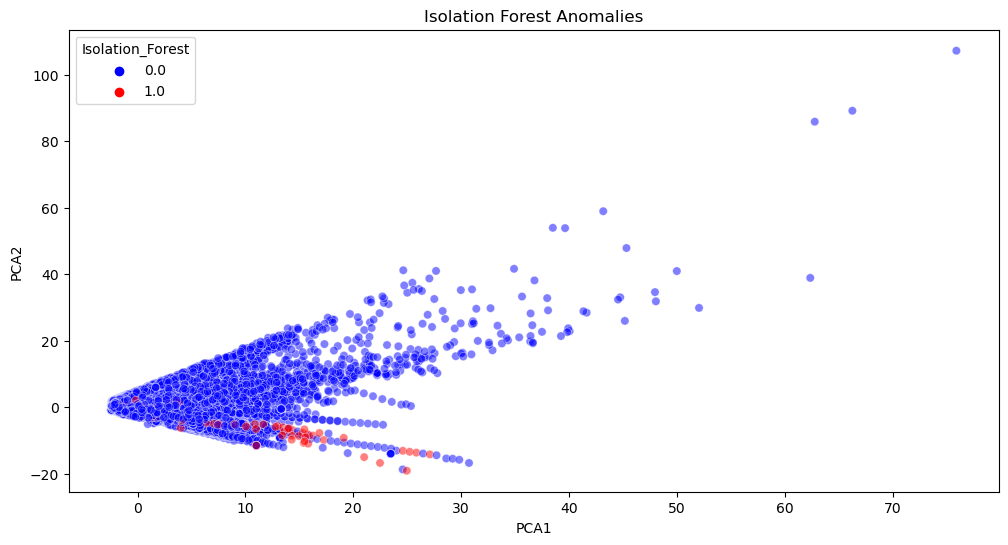

In [81]:
# Plot for Isolation Forest
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=data1['Isolation_Forest'], data=transactions_pca, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Isolation Forest Anomalies')
plt.show()


In [76]:
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
data1['LOF'] = lof.fit_predict(features)
data1['LOF'] = data1['LOF'].map({1: 0, -1: 1})

# Evaluate
print(classification_report(data1['Class'], data1['LOF']))
print('ROC-AUC Score:', roc_auc_score(data1['Class'], data1['LOF']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284310
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284802
   macro avg       0.50      0.50      0.50    284802
weighted avg       1.00      1.00      1.00    284802

ROC-AUC Score: 0.4994987865358236


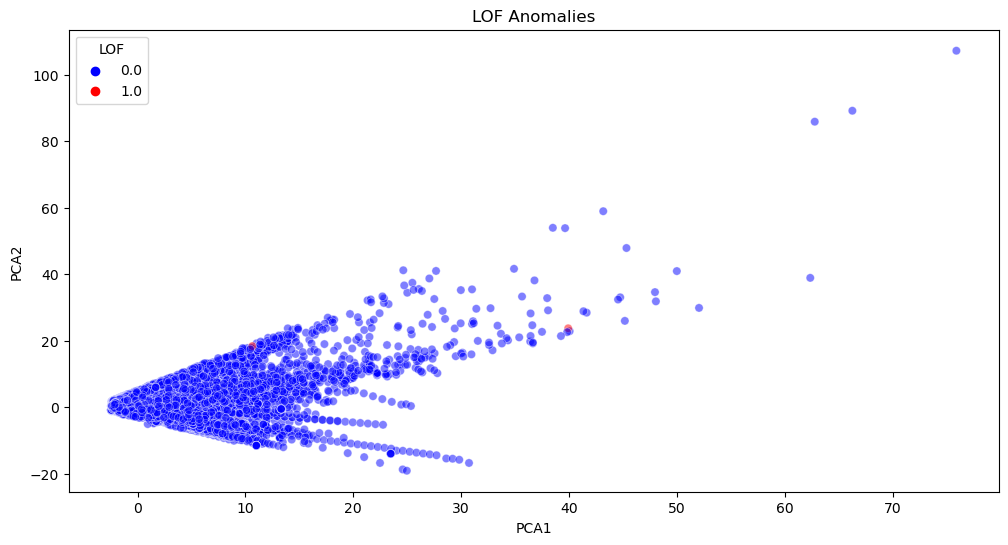

In [82]:
# Plot for LOF
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=data1['LOF'], data=transactions_pca, palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('LOF Anomalies')
plt.show()